### All the Life Cycle in a Data Science Project
- Data Analysis
- Feature Engineering ( Data Preprocessing )
- Feature Selection
- Model Building
- Model Deployment

### About the data
RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.
RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:

- R (Recency - months since the last donation)
- F (Frequency - total number of donation)
- M (Monetary - total blood donated in c.c.)
- T (Time - months since the first donation)

A binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)

In [45]:
# Importing the require libraries
import pandas as pd
import numpy as np
from tpot import TPOTClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv("transfusion.data")
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [48]:
#Rename the target coloumn
data = data.rename(columns = {"whether he/she donated blood in March 2007":"target"})
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [49]:
data.shape

(748, 5)

In [50]:
#checking the data type
data.dtypes

Recency (months)         int64
Frequency (times)        int64
Monetary (c.c. blood)    int64
Time (months)            int64
target                   int64
dtype: object

In [51]:
# Getting some information from the data
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [52]:
data["target"].value_counts() # (1 stands for donating blood; 0 stands for not donating blood)

0    570
1    178
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

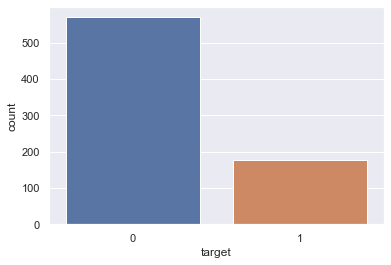

In [53]:
sns.countplot(x= "target",data = data)

We can observe that data is unbalanced

#### In Data Analysis(EDA) we will analyize to find out the below things
- Missing Values
- Distribution of all the numerical variables/features
- Outliers
- Relationship between independent and dependent feature( Target)

In [54]:
# finding the missing values
data.isnull().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
target                   0
dtype: int64

 There is no missing values in the data set

In [55]:
features = [feature for feature in data.columns if feature != "target"]
features

['Recency (months)',
 'Frequency (times)',
 'Monetary (c.c. blood)',
 'Time (months)']

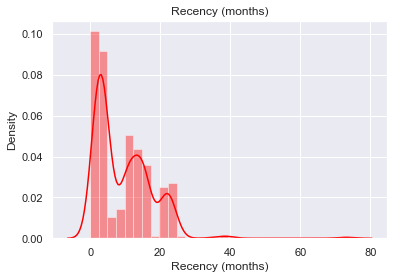

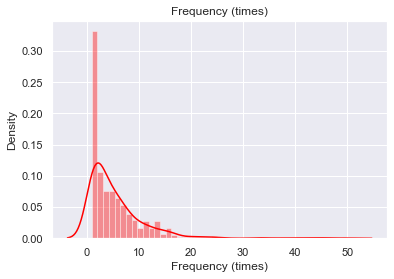

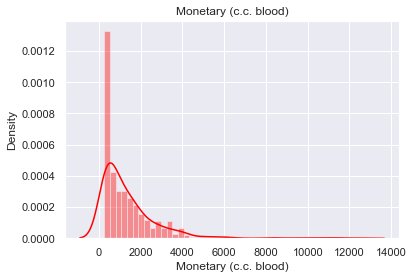

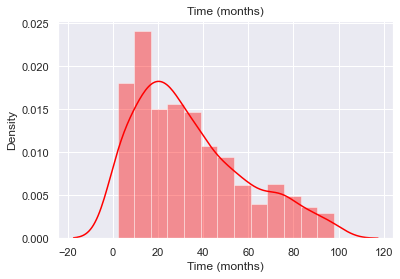

In [56]:
# Let's analyze the continuous variables by creating the Histogram to understand the distribution of each continuous feature
# features distribution
for feature in features:
    sns.distplot(x = data[feature],color = "red")
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

 we can see that features are not normally distributed.Some of are right skewed(positive skewness)

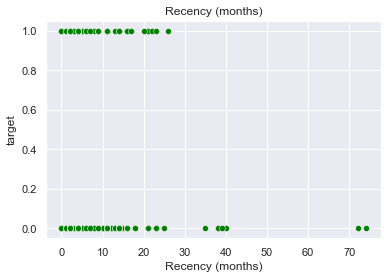

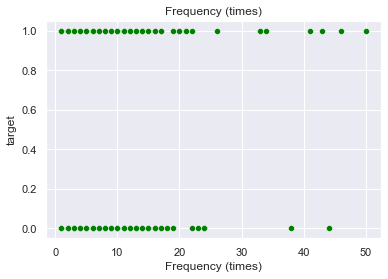

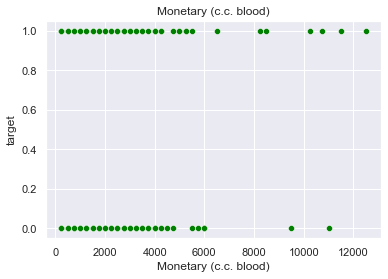

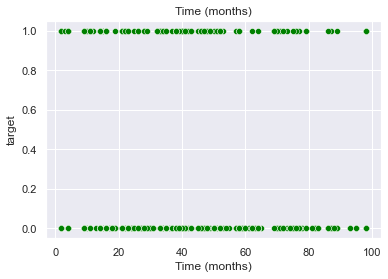

In [57]:
for feature in features:
    sns.scatterplot(x = feature,y = "target", data =data,color = "green")
    plt.xlabel(feature)
    plt.ylabel("target")
    plt.title(feature)
    plt.show()

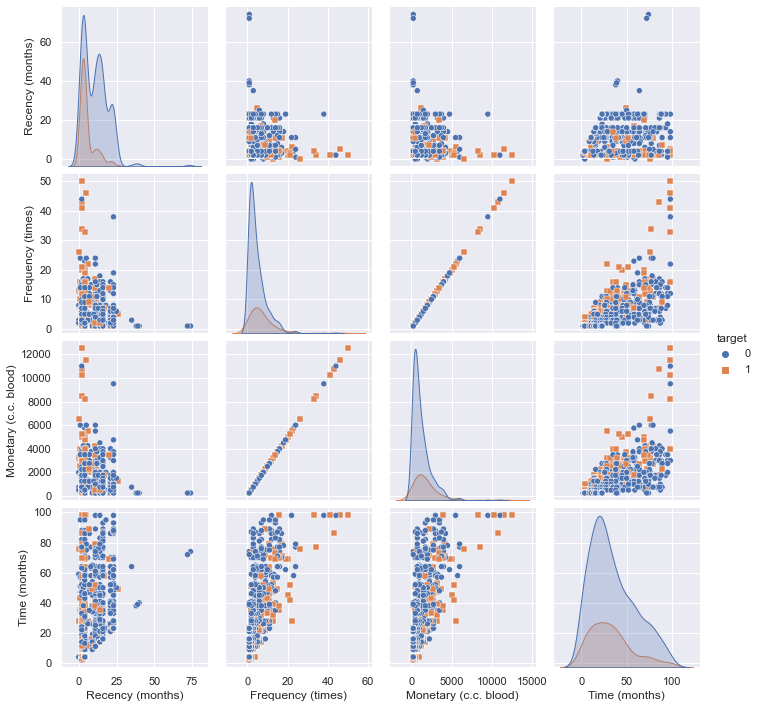

In [58]:
# pair plot to see the relationshi[] between features
sns.pairplot(data,hue = "target", markers=["o", "s"],height = 2.5)

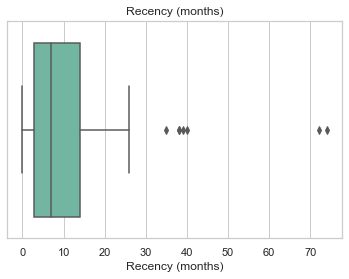

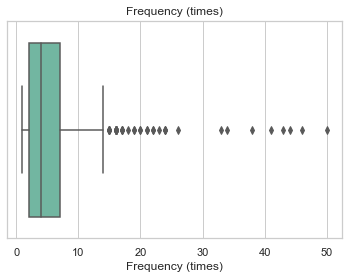

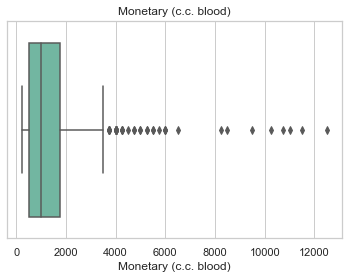

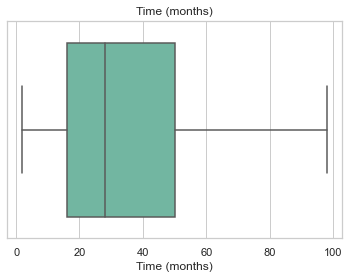

In [59]:
# checking the outliers 
for feature in features:
    sns.set_theme(style="whitegrid")
    sns.boxplot(x = data[feature],palette="Set2")
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()    

We can see there are outliers present in the features 'Recency (months)','Frequency (times)','Monetary (c.c. blood)'. we will use transfromation to remove the outliers effect.

In [60]:
#finding the correlation between the features
correlation_matrix = data.corr()
correlation_matrix

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
target,-0.279869,0.218633,0.218633,-0.035854,1.000000


<AxesSubplot:>

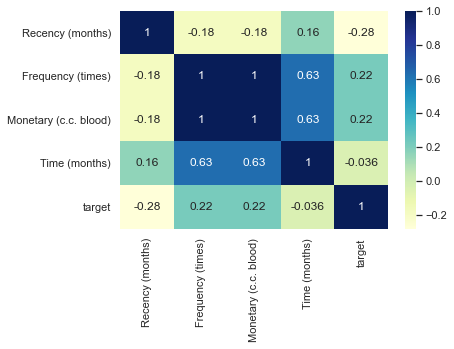

In [61]:
sns.heatmap(correlation_matrix,annot = True, cmap="YlGnBu")

we can see that features frequency and Monetary are highly correlated

In [62]:
# lets find out some internal relation between the features. it will give more information about the features.

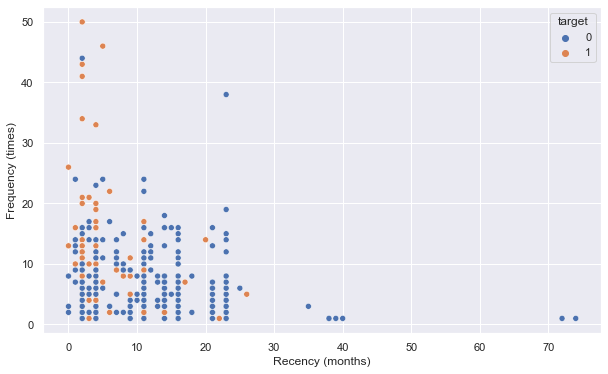

In [63]:
plt.figure(figsize = (10,6))
sns.set_style("darkgrid")
sns.scatterplot(x = "Recency (months)",y = "Frequency (times)",data = data,hue = "target")
plt.xlabel("Recency (months)")
plt.ylabel("Frequency (times)")
plt.show()    

we can observe that if a person has last blood donation more than 25 months ago.They have very low frequency of blood donation.And most likely they will not donate blood.There are some regular donors ,they have the high frequency( no. of times blood donated). Most likely These type of donors will donate blood.

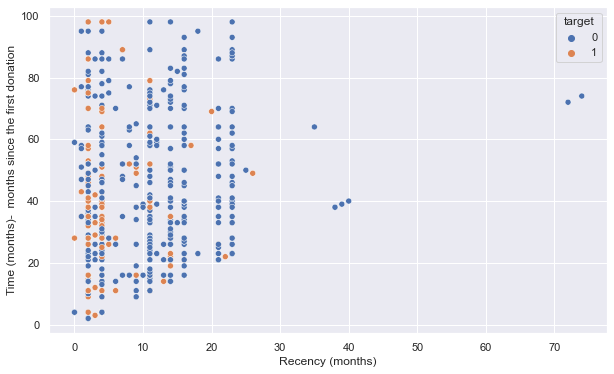

In [64]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "Recency (months)",y = "Time (months)",data = data,hue = "target")
plt.xlabel("Recency (months)")
plt.ylabel("Time (months)-  months since the first donation")
plt.show()   

we can observe that people having recency(months since the last donation)< 15 are most likely donating blood.

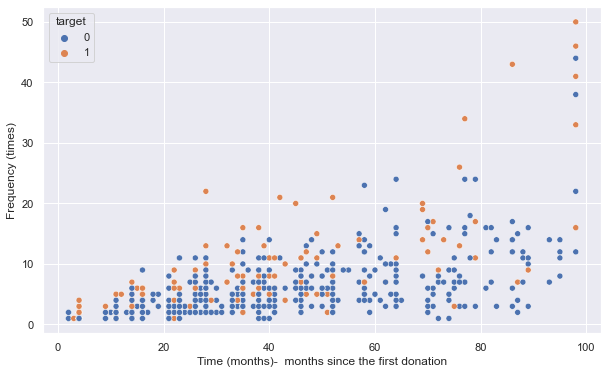

In [65]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "Time (months)",y = "Frequency (times)", hue = "target", data = data)
plt.ylabel("Frequency (times)")
plt.xlabel("Time (months)-  months since the first donation")
plt.show()   

we can observe their is good positive correlation between these two features.
We can see that there are some donors with very high blood donation frequency and have more than 90 months since the first donation. it means that these people are donating blood more oftenly than others.Most of the blood donating people have the blood donation frequency less than 25. 

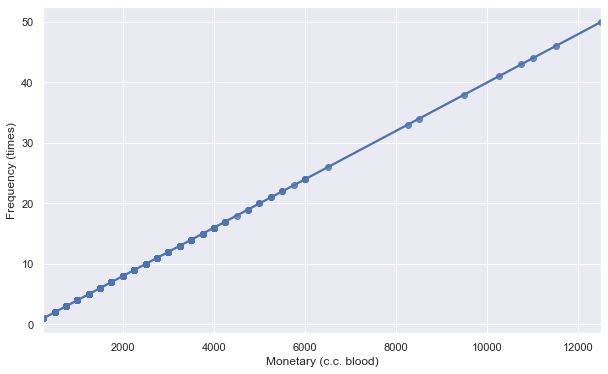

In [66]:
plt.figure(figsize = (10,6))
sns.regplot(x = "Monetary (c.c. blood)",y = "Frequency (times)",data = data)
plt.xlabel("Monetary (c.c. blood)")
plt.ylabel("Frequency (times)")
plt.show()  

we can see the correlation between these two feature is very high.So one feature can explain the other feature.